# Analysis of the results for the Crypto dataset
# `crypto_volume`
## Setup

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
timestamp = 1
day_length = 24 * timestamp
train_time = 300
coins = ["BTC", "ETH", "XRP", "BNB", "SOL", "TRX", "DOGE", "BCH", "ADA"]
total_num_coins = len(coins)

## Results

In [3]:
result = torch.tensor(np.load("STGAN/crypto_volume/result/2026-02-19_01-43-59/result.npy"), dtype=torch.float)

In [4]:
result.shape

torch.Size([1393, 9, 3])

In [5]:
coin_num = 0
days = 30

<Axes: >

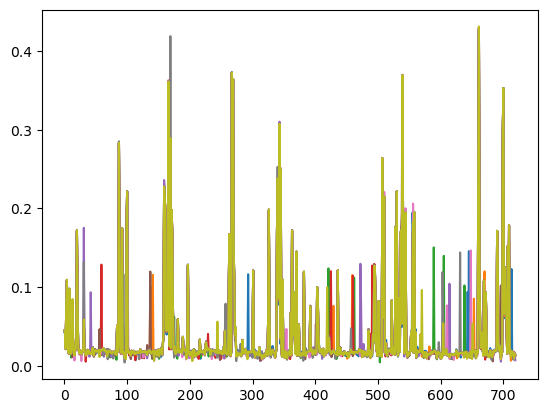

In [6]:
pd.DataFrame(result[:days*day_length, :, 0].numpy()).plot(legend=False)

<Axes: >

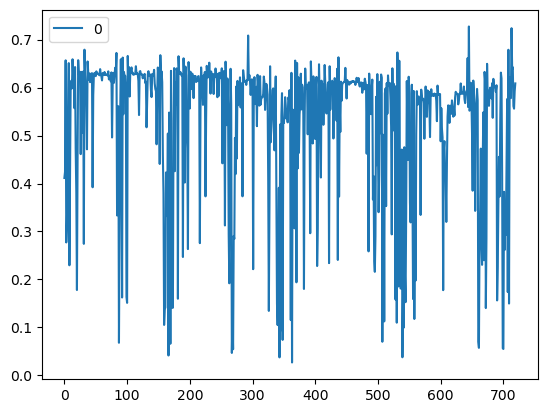

In [7]:
pd.DataFrame(result[:days*day_length, coin_num, 1].numpy()).plot()

<Axes: >

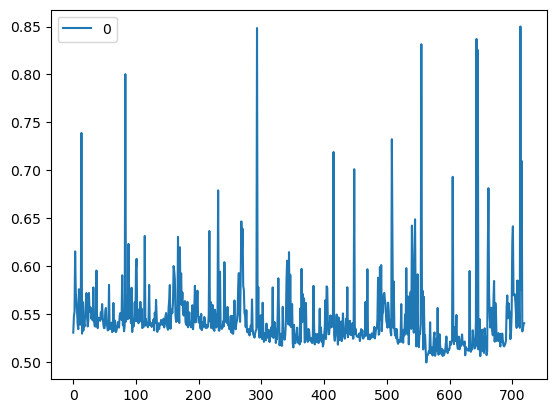

In [8]:
pd.DataFrame(result[:days*day_length, coin_num, 2].numpy()).plot()

## Anomaly scores from all the coins
Combining the two scores, from the generator and the discriminator.

In [9]:
lambda_coef = 1
for coin_num in range(result.shape[1]):
    column_name = "Score Coin " + str(coin_num)
    if coin_num == 0:
        anomaly_score = pd.DataFrame([], columns=[column_name])
    s_G = pd.DataFrame(result[:, coin_num, 0].numpy())
    s_D = pd.DataFrame(result[:, coin_num, 1].numpy()) - pd.DataFrame(result[:, coin_num, 2].numpy())
    anomaly_score[column_name] = s_G + lambda_coef * s_D

<Axes: >

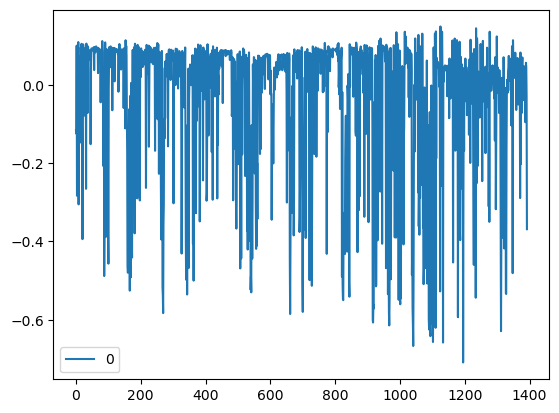

In [10]:
s_D.plot()

<Axes: >

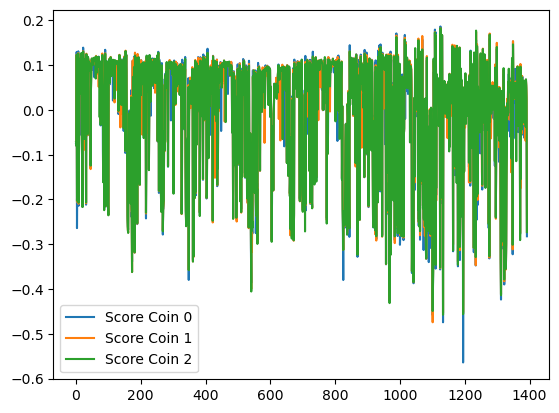

In [11]:
anomaly_score[anomaly_score.columns[:3]].plot()

In [12]:
anomaly_score

,Score Coin 0,Score Coin 1,Score Coin 2,Score Coin 3,Score Coin 4,Score Coin 5,Score Coin 6,Score Coin 7,Score Coin 8
0,-0.075859,-0.071782,-0.071657,-0.072000,-0.071263,-0.073406,-0.076638,-0.071520,-0.071323
1,-0.079903,-0.079386,-0.079597,-0.079445,-0.079507,-0.079399,-0.079501,-0.079779,-0.079524
2,0.129489,0.123445,0.122980,0.123813,0.124453,0.119975,0.121838,0.121076,0.121494
3,-0.263869,-0.205100,-0.202931,-0.202288,-0.200621,-0.202938,-0.202335,-0.207464,-0.202486
4,-0.154855,-0.153766,-0.153569,-0.151844,-0.151816,-0.151087,-0.153361,-0.153361,-0.153251
...,...,...,...,...,...,...,...,...,...
1388,-0.044419,-0.069255,-0.037507,-0.111160,-0.076960,-0.037890,-0.041042,-0.036719,-0.035562
1389,0.066314,0.067143,0.068501,0.073622,0.073404,0.041642,0.070629,0.065059,0.070986
1390,0.043736,0.054224,0.053577,0.029683,0.052435,0.051861,0.054516,0.053544,0.054171
1391,-0.048023,0.029581,0.023719,0.022648,0.027897,0.031232,0.031382,0.031546,-0.021722


<Axes: >

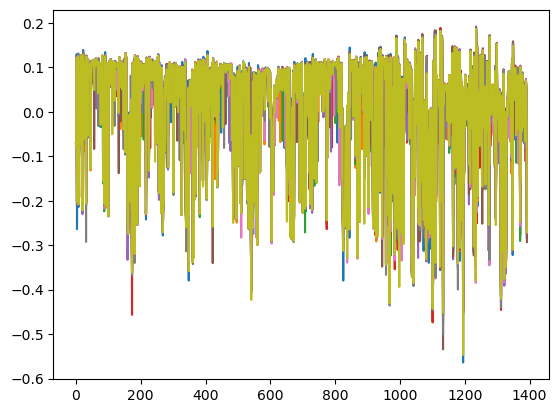

In [13]:
anomaly_score.plot(legend=False)

<Axes: title={'center': 'MSE loss'}>

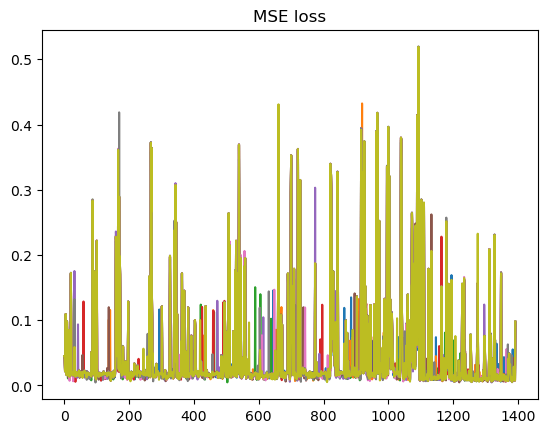

In [14]:
pd.DataFrame(result[:, :, 0].numpy()).plot(legend=False, title="MSE loss")

<Axes: title={'center': 'Real score'}>

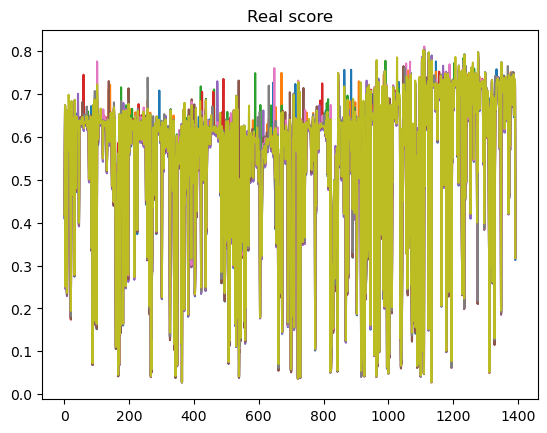

In [15]:
pd.DataFrame(result[:, :, 1].numpy()).plot(legend=False, title="Real score")

<Axes: title={'center': 'Fake score'}>

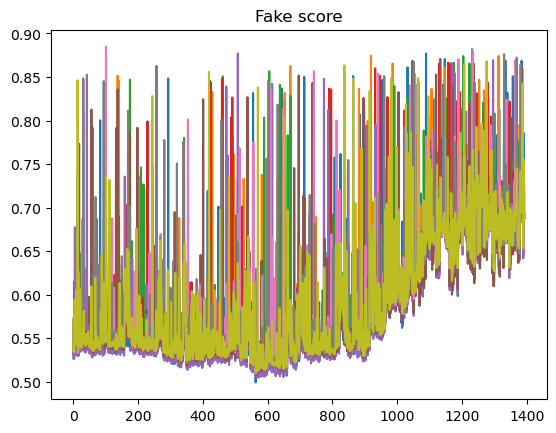

In [16]:
pd.DataFrame(result[:, :, 2].numpy()).plot(legend=False, title="Fake score")

## Selecting the top K% anomaly scores

In [17]:
K = 0.001

In [18]:
# Step 1: Flatten the DataFrame to get all values in a single array
flat_anomaly_score = anomaly_score.values.flatten()

# Step 2: Get the original coordinates
coordinates = [(i, j) for i in range(anomaly_score.shape[0]) for j in range(anomaly_score.shape[1])]

# Step 3: Sort the array while keeping track of the original coordinates
sorted_indices = np.argsort(flat_anomaly_score)[::-1]
sorted_coordinates = [coordinates[i] for i in sorted_indices]

# Print sorted coordinates
# for coord in sorted_coordinates:
#     print(coord)
#     print(anomaly_score.iloc[coord])

In [19]:
sorted_coordinates[:20]

[(1235, 4),
 (1235, 5),
 (1125, 3),
 (1235, 8),
 (1125, 0),
 (1235, 6),
 (1235, 7),
 (1108, 5),
 (1125, 1),
 (1125, 2),
 (1111, 5),
 (1125, 6),
 (1125, 8),
 (1108, 3),
 (1125, 7),
 (1108, 4),
 (1125, 4),
 (1111, 3),
 (1235, 3),
 (1108, 0)]

In [20]:
pd.Series([x[0] for x in sorted_coordinates[:20]]).nunique()

4

In [21]:
len(sorted_coordinates)

12537

<Axes: >

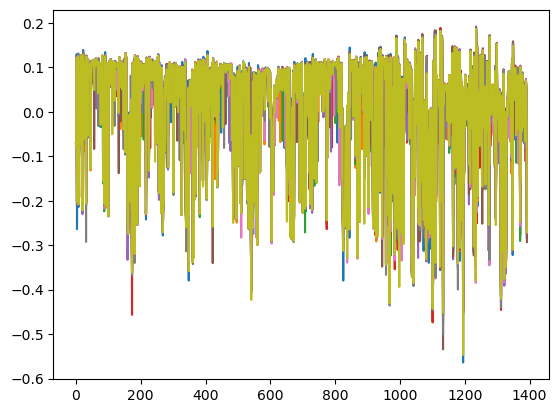

In [22]:
anomaly_score.plot(legend=False)

<Axes: >

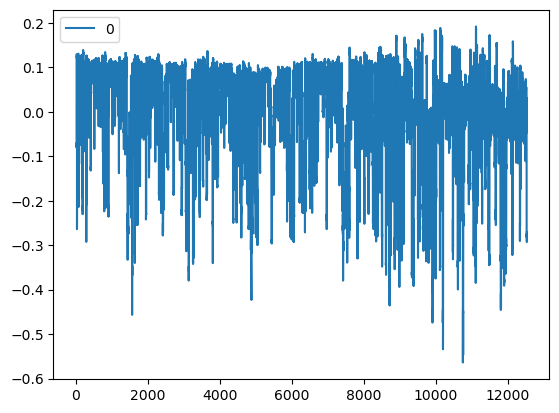

In [23]:
pd.DataFrame(flat_anomaly_score).plot()

In [24]:
head = int(np.floor(K * len(flat_anomaly_score)))

In [25]:
anomalies = sorted_coordinates[:head]
anomalies

[(1235, 4),
 (1235, 5),
 (1125, 3),
 (1235, 8),
 (1125, 0),
 (1235, 6),
 (1235, 7),
 (1108, 5),
 (1125, 1),
 (1125, 2),
 (1111, 5),
 (1125, 6)]

In [26]:
minutes = pd.Series([minutes for minutes, coin_nums in anomalies])
coin_nums = pd.Series([coin_nums for minutes, coin_nums in anomalies])

In [27]:
minutes

0     1235
1     1235
2     1125
3     1235
4     1125
5     1235
6     1235
7     1108
8     1125
9     1125
10    1111
11    1125
dtype: int64

In [28]:
coin_nums

0     4
1     5
2     3
3     8
4     0
5     6
6     7
7     5
8     1
9     2
10    5
11    6
dtype: int64

In [29]:
assert(len(coins) == total_num_coins)
coins

['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'TRX', 'DOGE', 'BCH', 'ADA']

In [30]:
day_tmp, tmp = divmod(minutes*int(60/timestamp), 60*24)
days = day_tmp + 1
clock_hour, clock_min = divmod(tmp, 60)

for i, day in enumerate(days):
    print(f"Anomaly at: Coin {coins[coin_nums[i]]}, day #{day} of test, at {clock_hour[i]}:{clock_min[i]}.")

Anomaly at: Coin SOL, day #52 of test, at 11:0.
Anomaly at: Coin TRX, day #52 of test, at 11:0.
Anomaly at: Coin BNB, day #47 of test, at 21:0.
Anomaly at: Coin ADA, day #52 of test, at 11:0.
Anomaly at: Coin BTC, day #47 of test, at 21:0.
Anomaly at: Coin DOGE, day #52 of test, at 11:0.
Anomaly at: Coin BCH, day #52 of test, at 11:0.
Anomaly at: Coin TRX, day #47 of test, at 4:0.
Anomaly at: Coin ETH, day #47 of test, at 21:0.
Anomaly at: Coin XRP, day #47 of test, at 21:0.
Anomaly at: Coin TRX, day #47 of test, at 7:0.
Anomaly at: Coin DOGE, day #47 of test, at 21:0.


## Plotting the anomalies for a specific coin

In [31]:
# Choose the coin
coin_num = 2

In [32]:
minutes[coin_nums == coin_num]

9    1125
dtype: int64

In [33]:
# Read again, all the training data
data = torch.tensor(np.load("STGAN/crypto_volume/data/data.npy"), dtype=torch.float)
df = pd.DataFrame(data[train_time*day_length:, coin_num, 0, 0])
df.columns = ["Adj Close"]

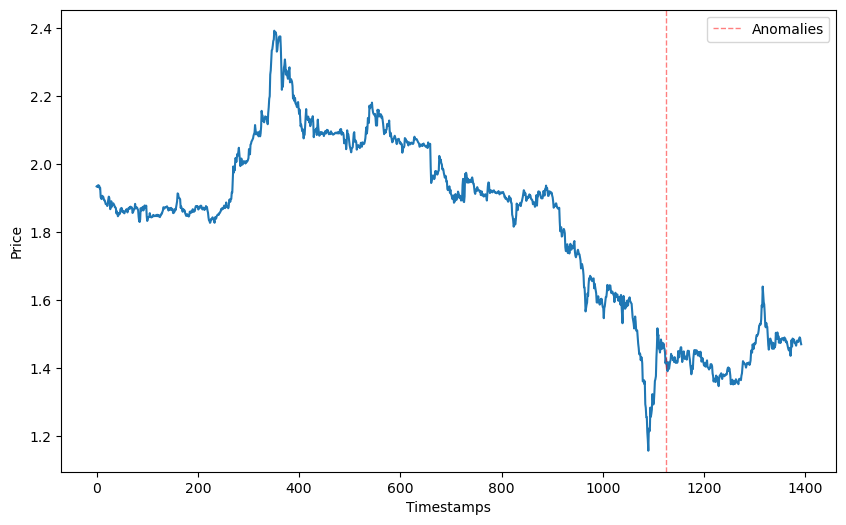

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df["Adj Close"])

for i, time in enumerate(minutes[coin_nums == coin_num]):
    if i == 0:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5, label="Anomalies")
    else:
        plt.axvline(x=time, color='r', linestyle='--', linewidth=1, alpha=0.5)


plt.xlabel("Timestamps")
plt.ylabel("Price")
plt.legend()
plt.show()